# <center> Cons of Cubic Spline Extrapolation
#### <center> Math 104A Final Project
#### <center> Professor Tang
#### <center> By Lin Fang, Sathvika Parimi, Katya Rodova, Aishvari Trivedi, Helen Zeng
#### <center> March 17, 2024

## Problem Statement and Motivation

Extrapolating cubic splines offers an incredibly valuable tool for analysts and researchers who seek to extend their understanding of trends in data beyond the observed ranges. Of which, since cubic splines are renownedly known for their flexibility and adaptability, it is natural to hope to leverage extrapolation for estimations outside of the dataset, and utilize predictive analysis and forecasting in many professional fields. However, there are many limitations, particularly when it is applied to datasets with very large x values and if there are substantial gaps between data points. In this project, we will investigate the certain drawbacks of cubic extrapolation and look into why natural and quadratic cubic splines interpolation algorithms often yield suboptimal results under specific criteria/conditions.

Our motivation stems from the critical need to assess the reliability and suitability of cubic extrapolation and natural, quadratic cubic splines interpolation algorithms, of handling datasets with large x values and substantial gaps between data points. Since, for most real-world data sets, these factors are necessary to deal with, to ultimately fill in the gaps of data from measurement tools and make future predictions. Some of the numerous applications include financial analysis, scientific research, and engineering design, where the ability to make accurate estimation values beyond the observed ranges and fill in key data points may be incredibly helpful if they would allow us to make informed decisions and predictions. Though, there are many more potential drawbacks then there may initially seem, such as tremendous inaccuracies, oscillations, or overshooting, which can all lead to misleading results and undermine the integrity of these analytical conclusions. As such, by conducting a more comprehensive investigation into the cons of cubic extrapolation and the limitations of natural and quadratic cubic splines interpolation algorithms, under the conditions of large x values and significant inter-data point distances, this project aims to provide insight for researchers, analysts, and practitioners alike. Ultimately, where we hope to refine the understanding of correct implementations of utilizing interpolation techniques for extrapolation, to eventually develop reliable methodologies in the future that may address the handling of missing data and forecasts in these challenging datasets in various fields.

## Literature
#### Cubic Spline Interpolation
Cubic spline interpolation is a technique used for creating a smooth, continuous curve through a series of data points. Between every pair of data points, it uses piecewise cubic polynomials to guarantee that the curve and its first two derivatives are continuous over the whole interval. This approach is preferred because it may retain a smooth and aesthetically pleasing curve while closely matching the observed data. "Numerical Recipes: The Art of Scientific Computing" (Press et al., 2007) offers a full reference to scientific computing approaches, including the mathematical underpinnings and real-world applications of cubic spline interpolation.

According to "Applications of Cubic Spline Interpolation on Functions in Normed Spaces," cubic spline interpolation is a numerical approach in which a partition divides a function's domain into segments, each of which is fitted with a polynomial up to degree three. The requirement that the cubic spline function intersect all data points on the graph of the function it approximates, corresponding to the x-values within the partition, emphasizes the idea of interpolation (Suzuki, 2023).

#### Applications of Cubic Splines
Cubic splines are highly versatile and effective at producing smooth curves, which makes them useful in a variety of industries. Some notable applications include:

</br><u>Computer Graphics:</u>  Cubic splines provide a smooth interpolation approach between control points when designing surfaces and curves in computer graphics. For modeling objects, rendering sceneries, and producing animations, this program is essential (Prenter, 1975).

</br><u>Data Visualization:</u> Splines are crucial to this process because they allow for the creation of smooth curves that faithfully depict data patterns. When presenting financial, meteorological, or scientific data—where accuracy and clarity are crucial—this application is quite helpful (Hamming, 1986).

</br><u>Engineering Design:</u> In engineering, parts with precise geometries, such car bodywork and airplane surfaces, are designed using cubic splines. Their capacity to produce sleek, aerodynamic forms puts them at the forefront of performance and efficiency design optimization (Atkinson, 1989).

</br><u>Interpolation of Missing Data:</u> When attempting to estimate unknown values based on known data points, cubic splines are employed in time series or geographical data, thereby enabling complete analysis of datasets with gaps (Press et al., 2007).

</br><u>Financial Analysis:</u> Cubic splines can be utilized for inventory management, production planning, and marketing strategies. Consequently, precise time series forecasting may have significant implications for decision-making, planning, risk management, and investment across various financial sectors. Despite its effectiveness in capturing smooth changes of stock price curves, especially during relative market stability, achieving accurate forecasting remains to be an ongoing challenge that requires solutions (Yu, 2023).

#### Boundary Conditions and Their Implications
The behavior of cubic splines, particularly at the data set boundaries, is crucially dependent on the chosen boundary conditions. Commonly used conditions are "natural," "clamped," and "not-a-knot," each of which has unique properties that affect the curvature of the spline at the extremes of the data range. These boundary conditions are explored in "An Introduction to Numerical Analysis" (Atkinson, 1989), which explains their theoretical foundation and real-world applications. The significance of carefully choosing boundary conditions to get the intended interpolation results is highlighted by this work.

#### Limitations of Cubic Splines for Extrapolation
Although cubic splines are quite good at interpolating inside the boundaries of a particular data set, they are not very good at extrapolating. Splines that behave uncontrollably outside of the reported data range may produce conclusions that are not accurate because they are not constrained by external data points. "Numerical Methods for Scientists and Engineers" (Hamming, 1986) highlights this issue and advises against using cubic spline interpolation to estimate values outside of the data set. The book emphasizes how splines have a tendency to show abrupt divergence or excessive oscillations when they are extended outside of known data points.

#### Alternative Methods for Extrapolation
When predicting values outside of the observed data range, different methods are advised due to the limitations of cubic splines as an extrapolation tool. Statistical models or machine learning algorithms that take into consideration seasonality, wider patterns, and other outside variables are examples of these. According to "Splines and Variational Methods" (Prenter, 1975), splines are effective instruments for interpolating data, but when the goal extends to extrapolation, their use should be carefully examined. In order to prevent noise and overfitting, it is also advised to use smaller polynomials.

## Design of Approach
Cubic spline interpolation is used for generating intermediary points, or points within a given set of known points. These intermediary points represent function values derived from an interpolation function, known as a spline, comprising several cubic piecewise polynomials. This project analyzes the cons of constructing new points outside of the boundaries of a set of known points or aside from the intermediary points - known as extrapolation.

#### Cubic Spline Interpolation
Cubic spline interpolation is the process of constructing a spline, which is a function $f: [x_1,x_{n+1}] → \mathbb{R}$ which consists of n piecewise-defined polynomials $f_i: [x_i,x_{i+1}]$ of degree three. Opposed to regression, the interpolation function traverses all n+1 predefined points of a data set D. The resulting function has the following structure:

$$ f(x) = \begin{cases}
          a_1x^3 + b_1x^2 + c_1x + d_1 \text{ if } x \in [x_1,x_2] \\    
          a_2x^3 + b_2x^2 + c_2x + d_2 \text{ if } x \in [x_2,x_3] \\
          ... \\
          a_3x^3 + b_3x^2 + c_3x + d_3 \text{ if } x \in [x_n,x_{n+1}] \\
          \end{cases} $$

Note that all polynomials are just valid within an interval; they compose the interpolation function. While extrapolation predicts a development outside the range of the data, interpolation works just within the data boundaries $[x_1,x_{n+1}]$.

#### Properties of Cubic Spline
In order to determine the 4n coefficients of all polynomials every polynomial is known to pass through exactly two points. Therefore, the 2n equations are:

$$ f_1(x_1) = y_1 \text{ (or } a_1x_1^3 + b_1x_1^2 + c_1x_1 + d_1 = y_1) $$
$$ f_1(x_2) = y_2 \text{ (or } a_1x_2^3 + b_1x_2^2 + c_1x_2 + d_1 = y_2) $$
$$ f_2(x_2) = y_2 \text{ (or } a_2x_2^3 + b_2x_2^2 + c_2x_2 + d_2 = y_2) $$
$$ f_2(x_3) = y_3 \text{ (or } a_2x_3^3 + b_2x_3^2 + c_2x_3 + d_2 = y_3) $$
$$ ... $$
$$ f_n(x_n) = y_n \text{ (or } a_nx_n^3 + b_nx_n^2 + c_nx_n + d_n = y_n) $$
$$ f_n(x_n+1) = y_{n+1} \text{ (or } a_nx_{n+1}^3 + b_nx_{n+1}^2 + c_nx_{n+1} + d_n = y_{n+1)} $$

They express that at $x=x_1$, the value of the first polynomial is equal to $y_1$, and at $x=x_2$, the value is $y_2$. For the point where the second polynomial begins ($x=x_2$), which is exactly where the first polynomial has ended, the second polynomial’s value is $y_2$. At $x=x_3$ it is $y_3$, and so forth where $y_i$ is the output of the original function that is being interpolated.

Furthermore, the first and second derivatives of all polynomials are identical at the points where they meet their adjacent polynomial. The derivatives of polynomials of degree three are $\frac{d}{dx} f_i(x) = 3a_ix^2+ 2b_ix + c_i$ and $\frac{d^2}{dx^2} f_i(x) = 6a_ix + 2b_i$. $f_1$ touches the second polynomial $f_2$ at $x_2$, the second the third at $x_3$ and so forth until $f_{n-1}$ touches $f_n$ at $x_n$:
$$ \frac{d}{dx} f_1(x) = \frac{d}{dx} f_2(x) |_{x = x_2} $$
$$ \frac{d}{dx} f_2(x) = \frac{d}{dx} f_3(x) |_{x = x_3} $$
$$ ... $$
$$ \frac{d}{dx} f_{n-1}(x) = \frac{d}{dx} f_n(x) |_{x = x_n} $$

Evaluated at the corresponding x values, that gives:
$$ 3a_1x_2^2 + 2b_1x_2 + c_1 = 3a_2x_2^2 + 2b_2x_2 + c_2 $$
$$ 3a_2x_3^2 + 2b_2x_3 + c_2 = 3a_3x_3^2 + 2b_3x_3 + c_3 $$
$$ ... $$
$$ 3a_{n-1}x_n^2 + 2b_{n-1}x_n + c_{n-1} = 3a_nx_n^2 + 2b_nx_n + c_n $$

Similarly, for the second derivative, the same is done by stating:
$$ \frac{d^2}{dx^2} f_1(x) = \frac{d^2}{dx^2} f_2(x) |_{x = x_2} \text{ (or } 6a_1x_2 + 2b_1 = 6a_2x_2 + 2b_2) $$
$$ \frac{d^2}{dx^2} f_2(x) = \frac{d^2}{dx^2} f_3(x) |_{x = x_3} \text{ (or } 6a_2x_3 + 2b_2 = 6a_3x_3 + 2b_3) $$
$$ ... $$
$$ \frac{d^2}{dx^2} f_{n-1}(x) = \frac{d^2}{dx^2} f_n(x) |_{x = x_n} \text{ (or } 6a_{n-1}x_n + 2b_{n-1} = 6a_nx_n + 2b_n) $$

This adds another $2(n-1)$ equations.

#### Boundary Condition
In order to be able to solve the system of equations, two more pieces of information are required. Arbitrary constraints like setting the third derivative in the, for instance, fourth point to zero may be used. However, the selection of a boundary condition, consisting of a pair of equations, is the commonly used method. Out of the four conditions: natural spline, not-a-knot spline, periodic spline, and quadratic spline this project will focus on natural spline and quadratic spline.  

#### Cubic Natural Splines
The natural spline is defined as setting the second derivative of the first and the last polynomial equal to zero in the interpolation function’s boundary points:

$$ 6a_1x_2 + 2b_1 = 0 $$
$$ 6a_nx_{n+1} + 2b_n = 0 $$

The visual interpretation is that the function’s change of steepness approaches zero in the first and last point.

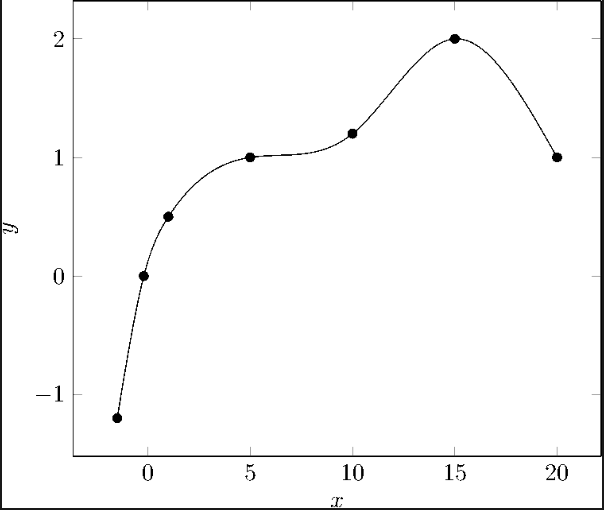

In [ ]:
#FIGURE 1
from IPython.display import display, Image
display(Image(filename='figure-1.png', width = 400, height = 400))

##### Figure 1: Cubic Natural Splines Visualization

#### Cubic Quadratic Splines
The quadratic boundary condition defines the first and the last polynomial to be quadratic which makes this method the simplest one. The two parabolas are highlighted in red in the plot below. Mathematically, the first coefficient of both polynomials is equal to zero: $a_1 = a_n = 0$

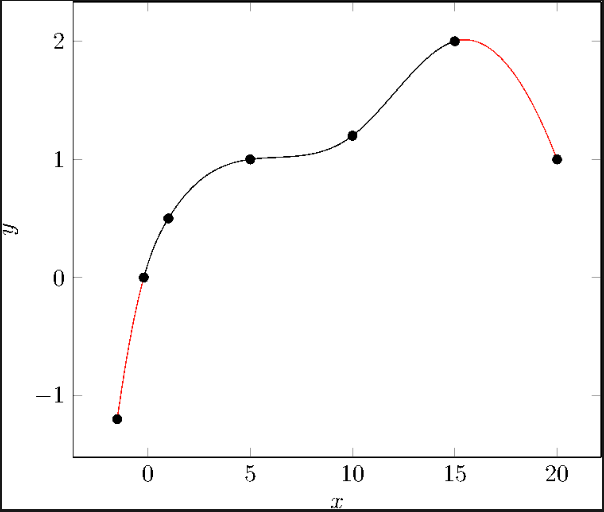

In [ ]:
#FIGURE 2
display(Image(filename='figure-2.png', width = 400, height = 400))

##### Figure 2: Cubic Quadratic Splines Visualization

## Analysis of Results

#### Extrapolation Cons for Cubic Natural Spline
The natural cubic splines typically use boundary conditions where the second derivatives at the endpoints are set to zero. These conditions ensure that the spline is smooth and avoids excessive oscillations within the data range.

However, when it comes to extrapolation (predicting values outside the range of the data), the use of natural cubic splines with zero second derivatives at the endpoints can lead to poor results. This is because the spline's behavior outside the data range is governed by the polynomial functions fitted to the data, and these polynomials tend to maintain the zero second derivative condition at the endpoints. As a result, natural cubic splines may produce unreliable extrapolations, as they assume that the function behaves similarly outside the data range as it does within. In reality, the data might follow a different trend beyond the observed range, and the spline's assumption of zero curvature beyond the endpoints can lead to inaccuracies in extrapolated values.

Alternative boundary conditions, such as setting the first derivatives or other conditions at the endpoints, may provide better extrapolation results depending on the characteristics of the data and the desired behavior of the spline function.

#### Extrapolation Cons for Cubic Quadratic Spline
Like cubic natural splines, quadratic splines also require boundary conditions to define the behavior at the endpoints.

The typical boundary conditions for quadratic splines involve specifying either the first derivative (slope) or the function value at the endpoints. These conditions ensure that the spline is continuous and smooth within the data range.

However, when it comes to extrapolation, quadratic splines can also exhibit limitations. The primary reason is that quadratic splines use lower-degree polynomials compared to cubic splines, which means they have less flexibility in capturing complex data patterns, especially outside the observed range.

When you extrapolate beyond the range of the data, quadratic splines tend to continue the same quadratic behavior observed within the data range. This can lead to poor extrapolation performance, especially if the underlying data trend changes significantly beyond the observed range. Additionally, quadratic splines may exhibit undesirable behavior near the endpoints when extrapolating, as they are constrained to fit a quadratic function to the data points, potentially leading to inaccuracies or unrealistic results.

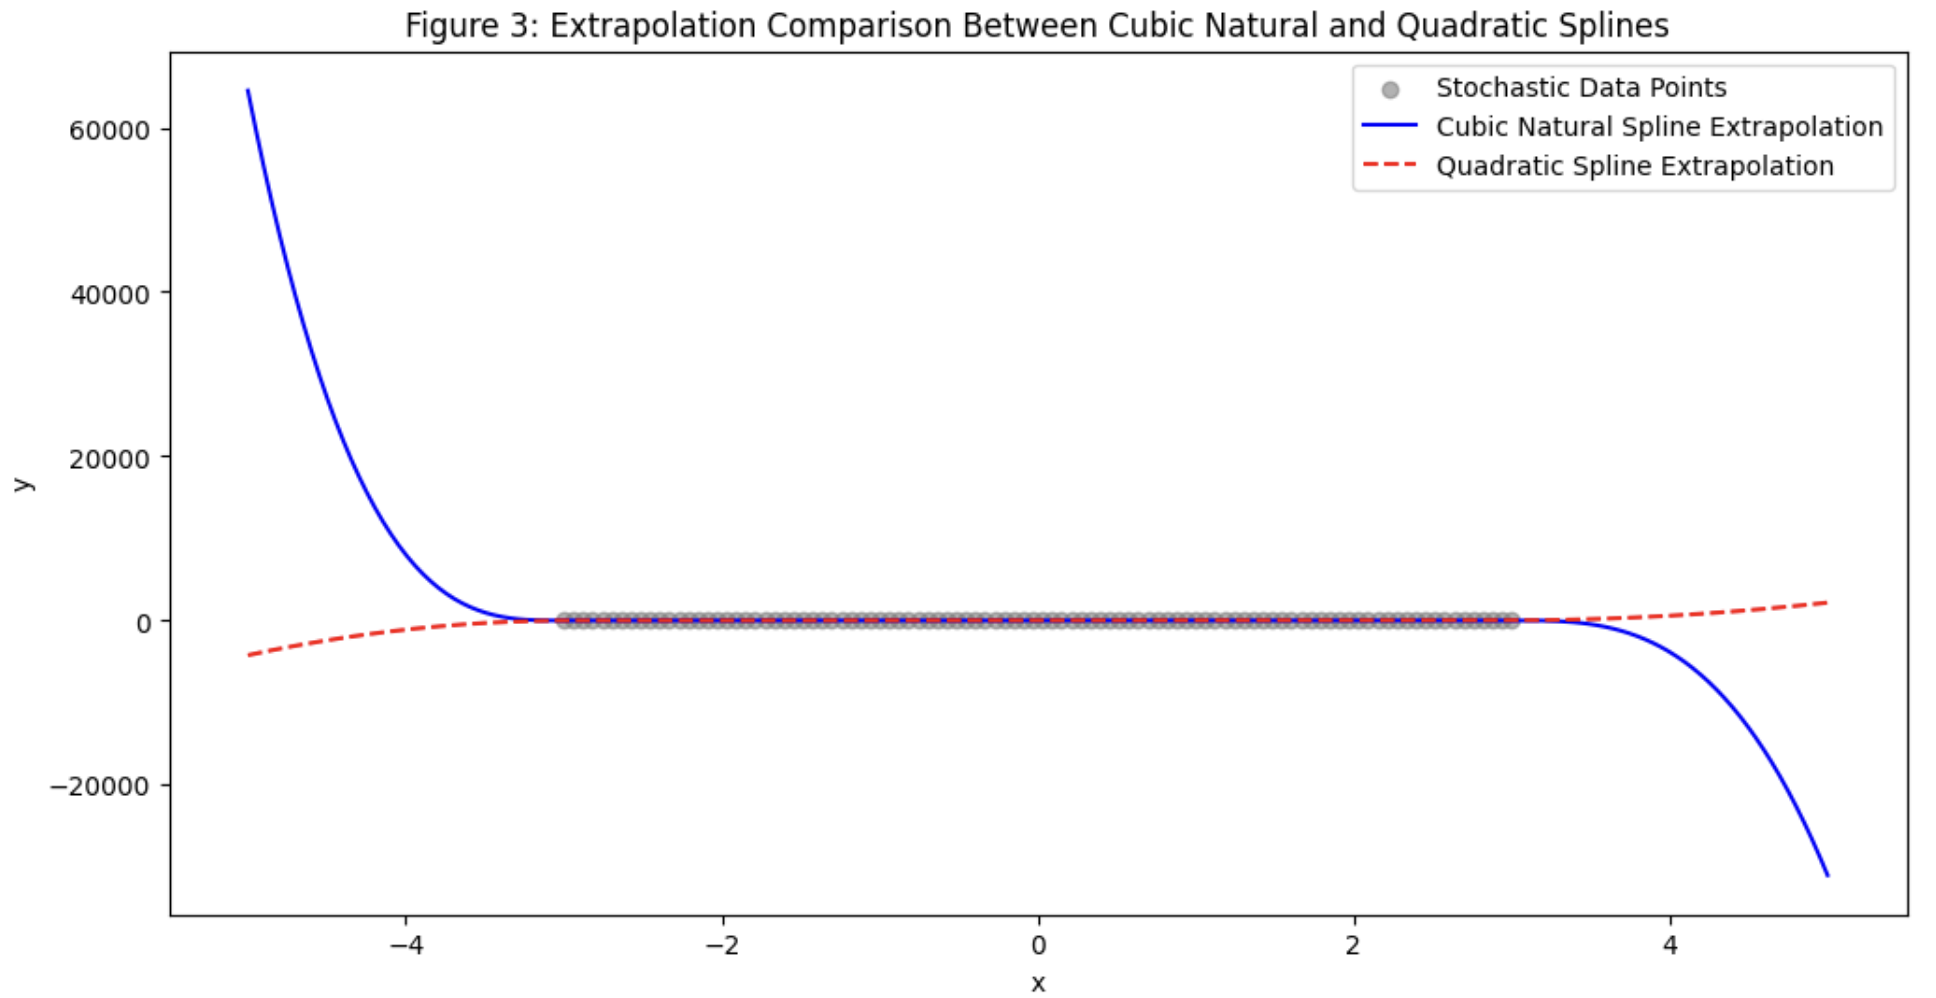

In [ ]:
#FIGURE 3
display(Image(filename='figure-3.png'))

In the graph shown in Figure 3, we illustrate the extrapolation behavior of both cubic natural and quadratic splines using stochastic data generated from the equation $f(x) = x^2 + N(0.5, 1)$, where $N(0.5, 1)$ denotes a normal distribution with mean $0.5$ and standard deviation $1$. The gray dots represent the stochastic data points, the blue line shows the
extrapolation using a cubic natural spline, and the red dashed line depicts the extrapolation
with a quadratic spline.

As we can see, within the range of the data $-3$ to $3$, both types of splines fit the
data points well, capturing the general trend of the underlying function. However, outside
this range, the behavior of the extrapolations diverges significantly from the expected
quadratic growth of the true underlying function $x^2$.

The cubic natural spline (blue line) tends to flatten out towards the ends due to the natural
spline's boundary condition of zero second derivatives, illustrating its conservative approach outside the observed data range. This leads to an underestimation of the true function values for large magnitudes of $x$.

The quadratic spline (red dashed line), constrained by its lower-degree polynomials, exhibits
a continuous but not necessarily accurate extrapolation of the data trend. While it attempts
to follow the quadratic nature of the data, the lack of higher-degree flexibility makes it
less reliable for predicting the function's behavior outside the observed range, potentially
leading to unrealistic or inaccurate predictions.

This example highlights the limitations of both cubic natural and quadratic splines for extrapolation purposes, especially when the true underlying function's behavior changes outside the observed data range.

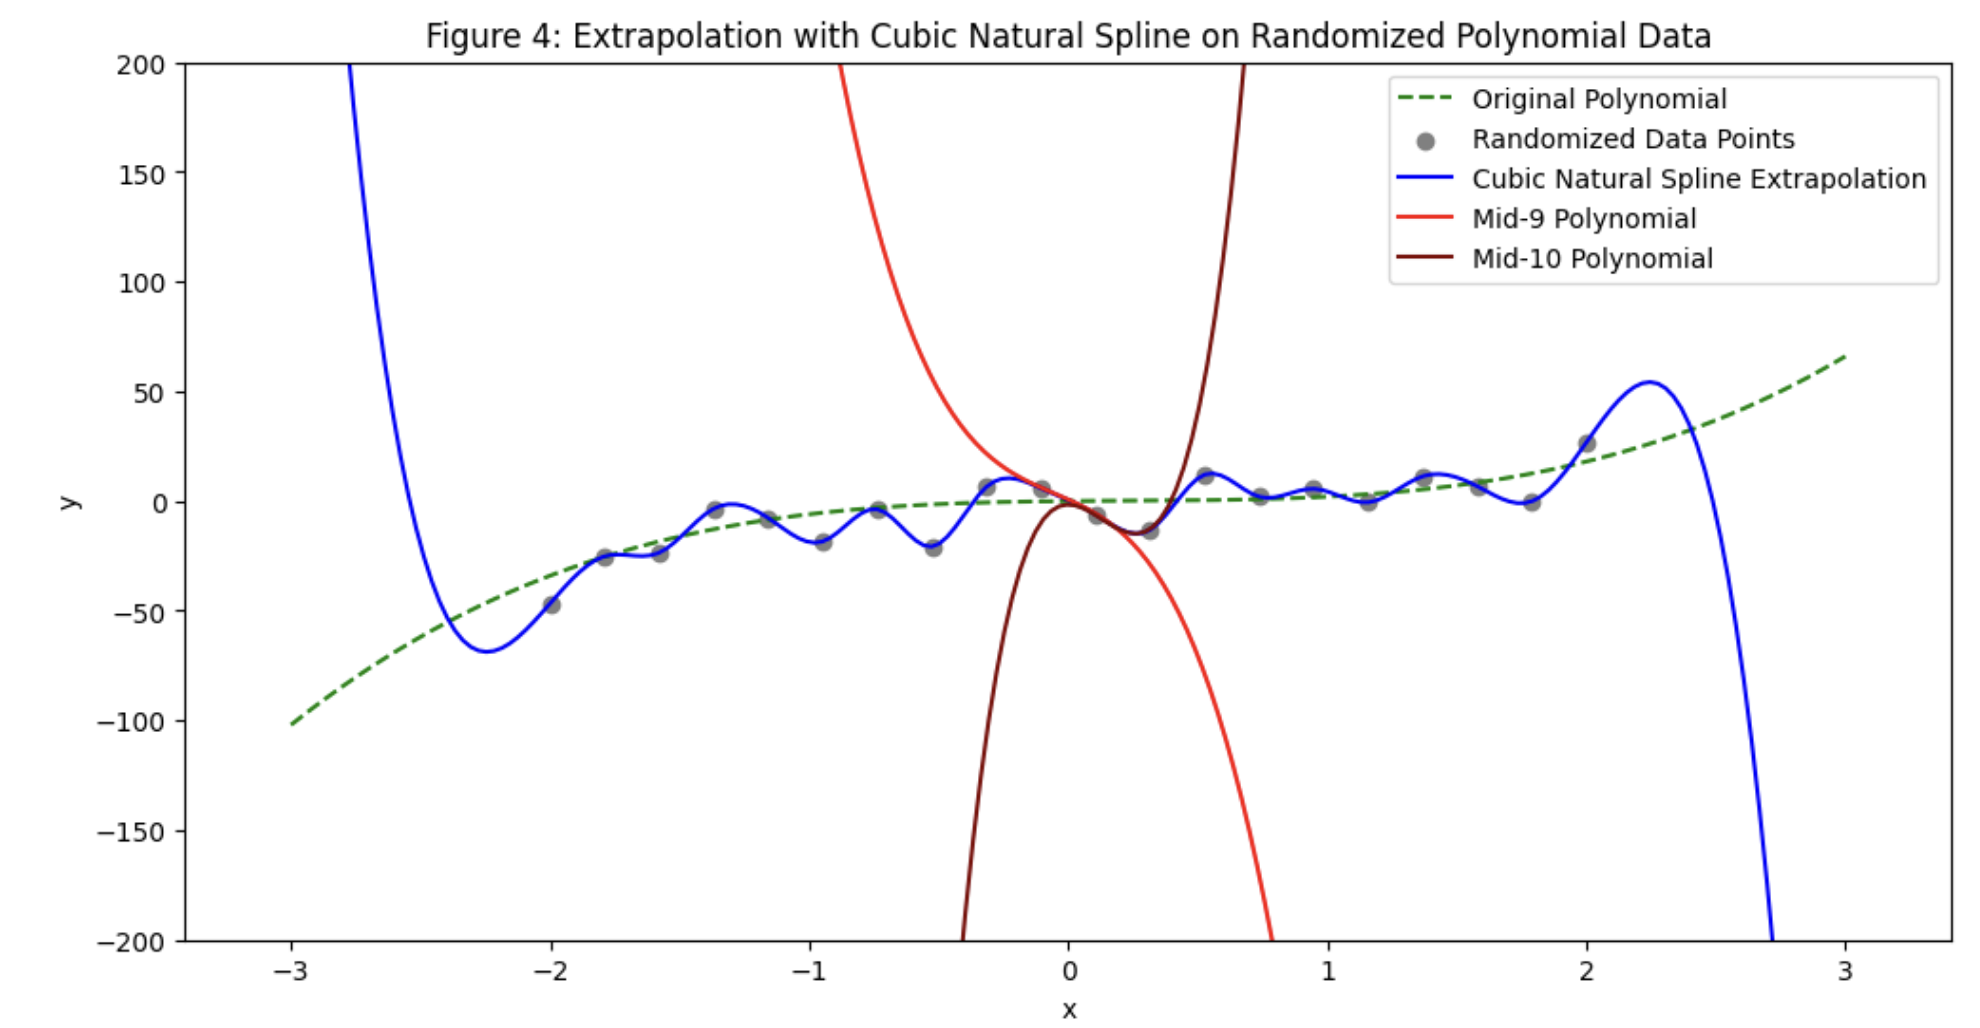

In [ ]:
#FIGURE 4
display(Image(filename='figure-4.png'))

In the graph shown in Figure 4, we demonstrate the extrapolation using a cubic natural spline on randomized data derived from a polynomial function $3x^3 - 2x^2 + x$, with added normal distribution noise to simulate measurement errors or data variability. The original polynomial is depicted by the green dashed line, the gray dots represent the randomized data points on the polynomial, and the blue line shows the extrapolation using a cubic natural spline.

The cubic natural spline fits the randomized data points within the original range of $-2$ to $2$ reasonably well, adapting to the noise-added data. However, as we extrapolate beyond this range (towards $-3$ and $3$), the spline's behavior starts to diverge significantly from the original polynomial function. This divergence is especially noticeable beyond the data points, where the spline extrapolation fails to capture the true underlying polynomial's growth rate and curvature.

This illustrates a key limitation of using cubic natural splines for extrapolation: the boundary conditions (zero second derivatives at the endpoints) can cause the extrapolated values to behave unnaturally compared to the actual trend of the data, leading to poor extrapolation results. This effect is exacerbated when the true function has significant curvature or when the behavior of the function changes outside the observed data range, highlighting the risks of relying on cubic natural splines for predictions beyond the range of the data.

Furthermore, this is exemplified by the mid-ninth and tenth piecewise functions that utilize the ninth and tenth interval accordingly. These piecewise models are fit for only their closest interval with a cubic spline, and it is relatively quick to see how quickly the predictions outside of their known interval diverge and become sporadically inaccurate, compared to our already established data. As such, it is very natural for cubic splines when employing extrapolation that the same is true for predictions outside of the known interval. Therefore, this demonstrates why there is significant need to be cautious for extrapolating cubic splines.

## Discussion and Conclusion

The goal of this study was to examine the shortcomings of cubic spline extrapolation, with a particular emphasis on the application of natural and quadratic cubic splines for managing large x values and notable gaps between data points. Our findings show that although cubic spline interpolation is good at identifying patterns in the observed data range, it is not very good at extrapolating. When dealing with big x values, the intrinsic constraints of cubic spline extrapolation become evident. Because of its zero second-derivative boundary constraints at endpoints, the natural cubic spline exhibited conservative behavior that caused the extrapolated values to be underestimated. A limited utility for this spline in predictive analyses is implied by this misinterpretation of the data trajectory.

Because of its lower polynomial degree, the quadratic spline model, while simpler, was also less successful in capturing the essence of data trends that extended beyond the observed range. These results are consistent with the literature that has been published, which supports the idea that although cubic spline interpolation is effective for modeling within the constraints of available data, it should be used with caution when extrapolating. In disciplines like financial analysis, scientific research, and engineering where precision is crucial, the inaccuracy of values extrapolated using these methods presents serious concerns.
Additionally, our research supports theoretical hypotheses indicating that other approaches, such as statistical modeling or machine learning techniques, might provide more trustworthy extrapolation. These methods may take into account more general data trends and are flexible enough to adjust to unexpected data behaviors outside the observed range.

#### Future Work
Our research purpose provides a clear path for further investigation. It is necessary to create new approaches that combine improved prediction abilities for unobserved ranges with the reliability of cubic splines within observed ranges. Subsequent research endeavors may involve investigating hybrid models that integrate the advantages of cubic spline interpolation with adaptive algorithms that can adapt to new patterns in data.

Improved outcomes might also come from more research into the choice and enhancement of boundary conditions. It's important to investigate how different boundary conditions can lessen the tendency of splines to diverge significantly as they are extended. It is necessary to do empirical research to test these conditions on a variety of datasets.

Ultimately, even though cubic splines are incredibly useful for some interpolation jobs, it's important to recognize and deal with their extrapolation restrictions. Our research emphasizes how important it is to use these mathematical tools carefully and to keep improving them so they can adapt to the intricate requirements of data analysis in modern times and the future.

## References
Atkinson, K. E. (1989). An Introduction to Numerical Analysis (2nd ed.). Wiley.
</br>

Hamming, R. W. (1986). Numerical Methods for Scientists and Engineers (2nd ed.). Dover Publications.
</br>

Prenter, P. M. (1975). Splines and Variational Methods. John Wiley & Sons.
</br>

Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge University Press.
</br>

Proven Reserves Exploitation. (n.d.). Problem with Cubic Splines. https://www.proven-reserves.com/CubicSplines.php
</br>

Suzuki, C. (2023). Applications of Cubic Spline Interpolation on Functions in Normed Spaces. Master’s Thesis, California State University, Long Beach.
</br>

Xitai Yu (2023). Application Research of Spline Interpolation and ARIMA in the Field of Stock Market Forecasting.

## Appendix

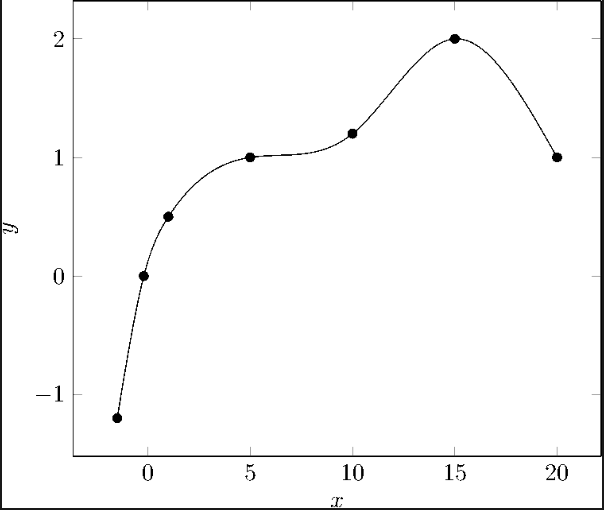

In [ ]:
# CODE FOR FIGURE 1
from IPython.display import display, Image
display(Image(filename = 'figure-1.png', width = 400, height = 400))

##### Figure 1: Cubic Natural Splines Visualization

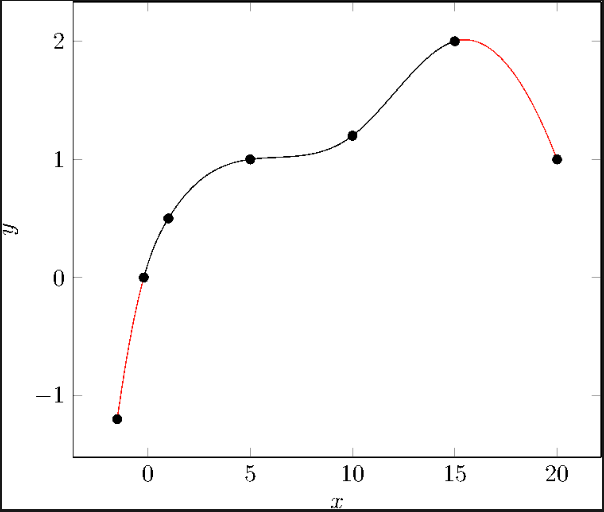

In [ ]:
# CODE FOR FIGURE 2
display(Image(filename = 'figure-2.png', width = 400, height = 400))

##### Figure 2: Cubic Quadratic Splines Visualization

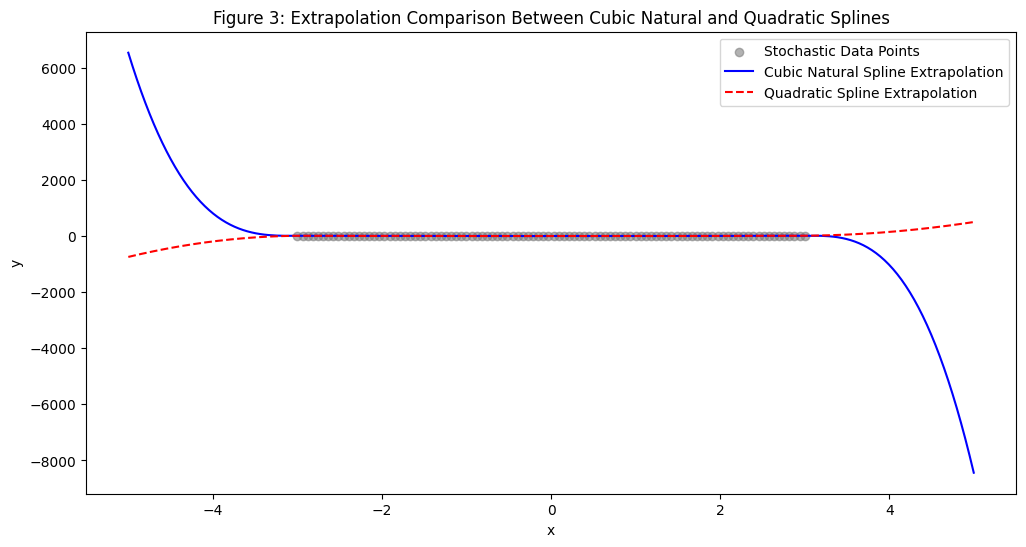

In [ ]:
# CODE FOR FIGURE 3
# Note: Figure 3 will appear different here from the one in the Analysis of Results
# section under subsection Extrapalation Cons for Cubic Quadratic Spline due to the
# randomization of data generated.

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d # Generate stochastic data based
# on x^2 + N(0.5, I) np.random.seed(0)

x = np.linspace(-3, 3, 100)
y = x**2 + np.random.normal(0.5, 1, size = x.shape)

# Fit cubic natural spline
cs = CubicSpline(x, y, bc_type = 'natural')

# Fit quadratic spline (linear piecewise as a simple approximation)
qs = interp1d(x, y, kind = 'quadratic', fill_value= "extrapolate") # Generate points
# for extrapolation
x_extrap = np.linspace(-5, 5, 200)

# Evaluate splines for extrapolation
y_extrap_cs = cs(x_extrap)
y_extrap_qs = qs(x_extrap)

# PLOTS
# Plot original data
plt.figure(figsize = (12, 6))
plt.scatter(x, y, color = 'gray', alpha = 0.6, label = 'Stochastic Data Points')

# Plot cubic spline extrapolation
plt.plot(x_extrap, y_extrap_cs, label = 'Cubic Natural Spline Extrapolation',
         color = 'blue')
# Plot quadratic spline extrapolation
plt.plot(x_extrap, y_extrap_qs, label = 'Quadratic Spline Extrapolation',
         color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 3: Extrapolation Comparison Between Cubic Natural and Quadratic Splines')
plt.show()

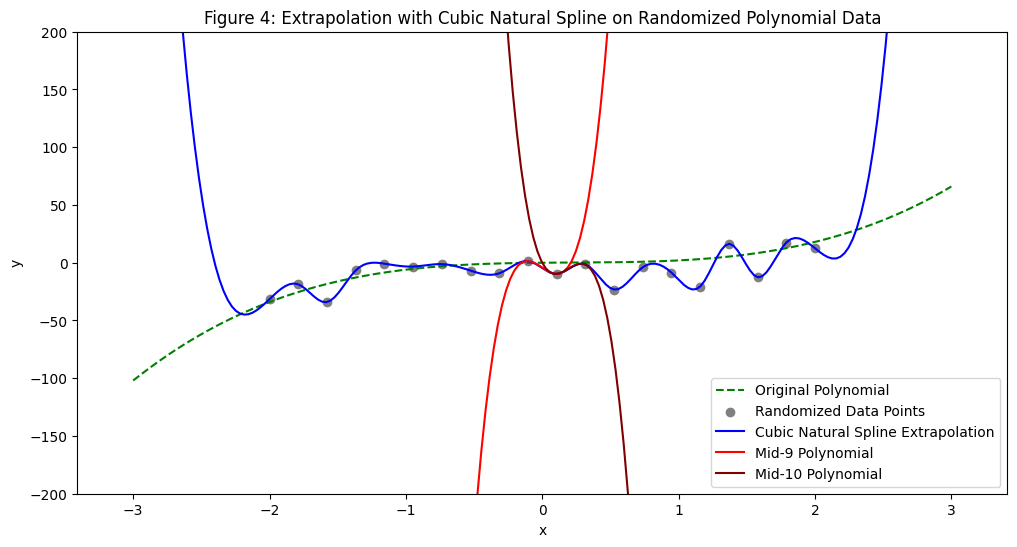

In [ ]:
# CODE FOR FIGURE 4
# Note: Figure 4 will appear different here from the one in the Analysis of Results
# section under subsection Extrapalation Cons for Cubic Quadratic Spline due to the
# randomization of data generated.

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d

# function declarations
def polynomial_func(x):
    return 3*x**3 - 2*x**2 + x

# calculate a cubic polynomial at value x with coefficients
def polynomial_func2(x, coeffs):
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]

# MAIN METHOD
# pick points on the polynomial
x_points = np.linspace(-2,2,20)
y_points = polynomial_func(x_points)

#randomize those points by adding normal distributuon noise
y_randomized = y_points + np.random.normal(0,10, size = y_points.shape)

#fit cubic natiral spline
cs_randomized = CubicSpline(x_points, y_randomized, bc_type = 'natural')

#generate points for extrapolation
x_extrap = np.linspace(-3,3,200)

#evaluate the cubic spline for extrapolation
y_extrap_cs_randomized = cs_randomized(x_extrap)
#shift by half of the interval
dx = (2-(-2))/20/2
y_piece9_points = polynomial_func2(x_extrap,  cs_randomized.c[:,9])
y_piece10_points = polynomial_func2(x_extrap,  cs_randomized.c[:,10])

# PLOTS

'''
plt.figure(figsize=(12,6))
plt.plot(x_extrap, polynomial_func(x_extrap), label="Original", color='green',
linestyle='--')
plt.plot(x_extrap, y_extrap_cs_randomized, label='Cubic Natural', color = 'blue')
plt.plot(x_extrap-dx, y_piece9_points, label='Mid-9 Polynomial', color = 'red')
plt.plot(x_extrap+dx, y_piece10_points, label='Mid-10 Polynomial', color = 'maroon')
'''

# plot the polynomial, randomized points, and spline extrapolation
plt.figure(figsize = (12,6))
plt.plot(x_extrap, polynomial_func(x_extrap), label = 'Original Polynomial',
         color = 'green', linestyle = '--')
plt.ylim(-200, 200)

plt.scatter(x_points, y_randomized, color = 'gray', label = 'Randomized Data Points')
plt.plot(x_extrap, y_extrap_cs_randomized,
         label = 'Cubic Natural Spline Extrapolation', color = 'blue')
plt.plot(x_extrap - dx, y_piece9_points, label = 'Mid-9 Polynomial', color = 'red')
plt.plot(x_extrap + dx, y_piece10_points, label = 'Mid-10 Polynomial',
         color = 'maroon')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 4: Extrapolation with Cubic Natural Spline on Randomized Polynomial Data')
plt.show()